
# Project: Investigate a Dataset - [TMDB MOVIES]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

this data set contains 21 columns :

id,  imdb_id,  popularity,  budget,  revenue,  original_title, cast, homepage,  director,  tagline,  keywords,  overview,  runtime,  genres,  production_companies,  release_date, vote_count,  vote_average,  release_year,  budget_adj, revenue_adj 
    
 most of the columns names self explain the content of the column
    
  

### Question(s) for Analysis

1st question: What is the most popular gener and what is the most profitable  ?

`I think answering this question will make the choice easier if i want to produce a movie and my aim is popularity, what genre should i choose for most success propability and if i aim at profit, what is the most gener i should choose` 

2nd question : what are the properties that is associated with higher rating movies ?

` i think answering this question will benefit producers for knowing what factor affects rating :)`

3rd question : Who is the actor that made the largest numbers of movies and who made the least and their ranking

` i think answering this question will help producers if they want to deal with experienced actors` 

Funny question_1 : is their a relation between the length of the movie title and its popularity ? :)

Funny question_2 : what is the starting character of movie titles that is associated with highest popularity? :)


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
df=pd.read_csv('../input/tmdb-movies-dataset/tmdb_movies_data.csv')

<a id='wrangling'></a>
## Data Wrangling



Lets expplore the dataset

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

so we have 10866 rows and 21 columns, for my analysis i think i will drop some columns,....also i will check and remove duplicates if any and deal with null values


### Data Cleaning


I think these columns `(imdb_id, homepage, tagline, keywords, overview)` are not needed in my analysis, so first thing is to drop them , also some other columns can be deleted`( budget, revenue )` as my calculation would be based on flattened value of adjusted budget and adjusted revunue

droping will be in a separte modified dataframe `df_m`, in case i needed the original one later

In [5]:
df_m=df.drop(['budget','revenue','imdb_id','homepage','tagline','keywords','overview'], axis=1)
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   original_title        10866 non-null  object 
 3   cast                  10790 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


before dealing with nan values, lets check duplicates and remove them

In [6]:
df_m.duplicated().sum()

1

In [7]:
df_m[df_m.duplicated()]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0


Just doublechecking presence of two identical rows :)

In [8]:
df_m[df_m.id==42194]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0
2090,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/2010,110,5.0,2010,30000000.0,967000.0


In [9]:
df_m.drop_duplicates(inplace=True)

lets see how many null values 

In [10]:
df_m.isnull().sum()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

so there are some movies with unknown  cast, others with unknown directors and others with unknown geners. 

The most nun values are in production_company, it is about 10 % of the data.

Best scenario is to obtain these data but if it is hard, i guess filling NAN with 'unknown' would be the best course of action 


In [11]:
df_m.fillna('unknown', inplace=True)
df_m.isnull().sum().sum()

0

In [12]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   original_title        10865 non-null  object 
 3   cast                  10865 non-null  object 
 4   director              10865 non-null  object 
 5   runtime               10865 non-null  int64  
 6   genres                10865 non-null  object 
 7   production_companies  10865 non-null  object 
 8   release_date          10865 non-null  object 
 9   vote_count            10865 non-null  int64  
 10  vote_average          10865 non-null  float64
 11  release_year          10865 non-null  int64  
 12  budget_adj            10865 non-null  float64
 13  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


lastly lets rename budget_adj and revenue_adj to just budget and revunue respectively and to add a profit column that is equal to revenuee minus budget

In [13]:
df_m.rename({'budget_adj':'budget', 'revenue_adj':'revenue'}, axis=1, inplace=True)
df_m['profit']=df_m['revenue']-df_m['budget']

Now i think the data is clean and tidy enough, specefic operations may be needed later based on each question 

<a id='eda'></a>
## Exploratory Data Analysis

before running any data analysis of any type it is better to have a general look

In [14]:
df_m.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,3.381911e+07
std,92134.091971,1.000231,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,1.252194e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.000000,0.207575,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,1.293091e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


wow, there are really some stunning numbers, for starter there is a runtime for a movie that was 900 minutes!! , average runtime is around 102 minutes. Also, there is a movie that actually achieved profit about 2.7 billions !! wow.

HOLD on, there are some strange numbers here, how can a movie runtime be 0. Revenue of zero and profit of zero can be accepted but runtime= zero is not, let's check it

In [15]:
df_m[df_m['runtime']==0]

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,profit
92,370687,1.876037,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/2015,11,5.4,2015,0.000,0.0,0.000
334,361931,0.357654,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/2015,80,6.5,2015,0.000,0.0,0.000
410,339342,0.097514,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,unknown,1/1/2015,15,5.6,2015,0.000,0.0,0.000
445,353345,0.218528,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,10/9/2015,52,5.0,2015,0.000,0.0,0.000
486,333653,0.176744,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/2015,11,5.4,2015,0.000,0.0,0.000
595,341051,0.028725,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,unknown,1/1/2015,11,4.6,2015,0.000,0.0,0.000
616,325843,0.026797,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,unknown,11/10/2015,20,6.6,2015,0.000,0.0,0.000
1241,296370,0.135376,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,unknown,0,Romance|Music|Comedy,unknown,1/1/2014,18,5.7,2014,0.000,0.0,0.000
1289,286372,0.037459,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,10/20/2014,16,3.4,2014,2993545.915,0.0,-2993545.915
1293,286256,0.036904,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,10/30/2014,14,6.0,2014,0.000,0.0,0.000


In [16]:
df_m.query('runtime==0').count()

id                      31
popularity              31
original_title          31
cast                    31
director                31
runtime                 31
genres                  31
production_companies    31
release_date            31
vote_count              31
vote_average            31
release_year            31
budget                  31
revenue                 31
profit                  31
dtype: int64

so the above movies has zero runtime and zero buget and zero revunue, i will just drop them out ( although their title indicates that zero is wrong entery)

In [17]:
df_m.drop(df_m[df_m.runtime==0].index, inplace=True)
df_m.query('runtime==0').count().sum()

0

In [18]:
df_m.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,1.083400e+04,1.083400e+04,1.083400e+04
mean,65750.128854,0.647762,102.363855,217.962064,5.976343,2001.295274,1.759896e+07,5.151599e+07,3.391703e+07
std,91819.986178,1.001204,30.948225,576.370933,0.935047,12.819708,3.434421e+07,1.448190e+08,1.253850e+08
min,5.000000,0.000065,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10586.250000,0.208536,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20551.000000,0.384691,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75055.000000,0.715448,112.000000,146.000000,6.600000,2011.000000,2.094246e+07,3.389667e+07,1.312114e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


hmmmmm..the median of budget and revenue columns are zero !,that is over 50 % of budget is recorded as zero !!!!!, lets check it

In [19]:
# checking the percentage of zero valued budget
(df_m['budget']<=0).sum()/(df_m['budget'].count())*100

52.31678050581503

Checking for numbers of rows that has either zero budget or zero revenue as a percentage of all the data

In [20]:
(((df_m['budget']<=0)|(df_m['revenue']<=0)).sum())/(df_m.budget.count())*100

64.4268045043382

Around of 65 % of the data has either zero or wrong profit calculations!!!, that should be noted and mentioned in the conclusion

lets have some hist, scatter figures all at once

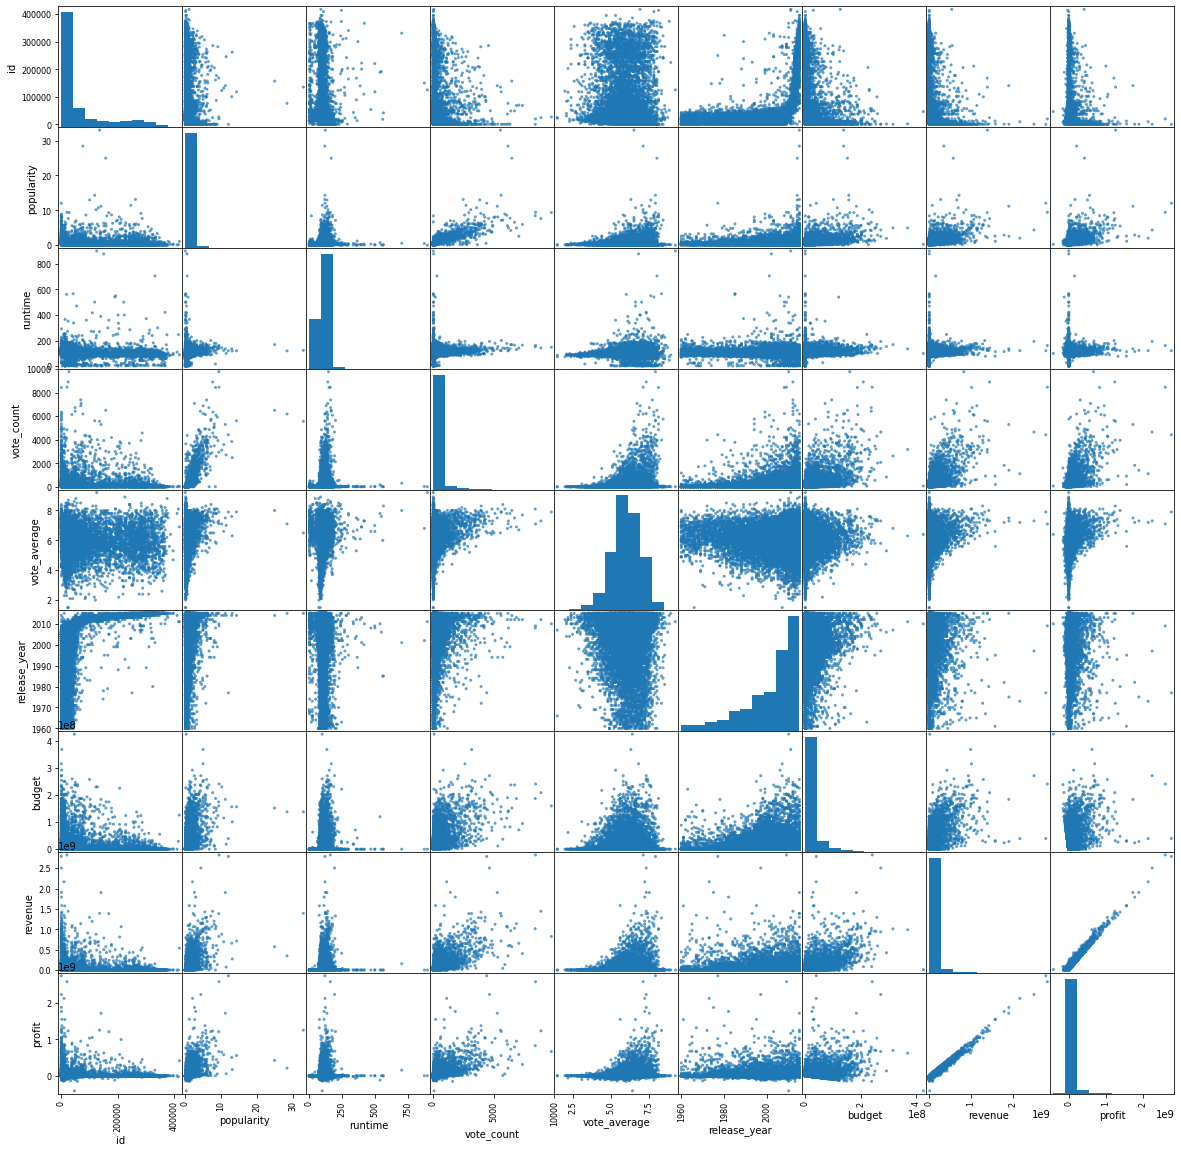

In [21]:
pd.plotting.scatter_matrix(df_m,alpha = 0.7, figsize= (20,20), grid=True );

from the above figures, some data can be concluded at glance, like :

1 - there is pretty direct relation between profit and revunue regardless of budget ( may be due to 52 % of budget is already zero).

2- there is a strange relation between id and year of release !!, i think from that relation i can conclude two things, 1st is newer movies has bigger id number than older and 2nd is that it seems the number of movies produced since around 2010 is exponentially increased, a hist of release year can confirm this 



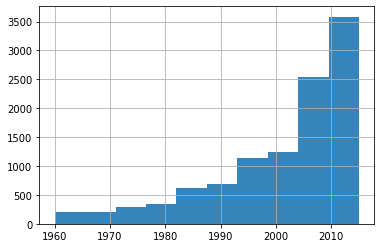

In [22]:
df_m['release_year'].hist(alpha=0.9);

### Research Question 1 (What is the most popular gener and what is the most profitable ??)

the problem is every movie has multiple genere, i may need to split this column and then explode!

first i will define df1 as df_m then i will split genre column and finally explode, this will increase the number of rows dramatically, but i think it the best course of action to apply group by to genre column

In [23]:
df1=df_m

In [24]:
df1=df1.assign(genres=df1.genres.str.split('|')).explode('genres')
df1.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08


After splitting, and exploding i will do a group by genres for total profit and sort by profit

In [25]:
df_geners_popularity=df1.groupby(['genres'],as_index=False)['popularity'].mean().sort_values(by=['popularity'])
df_geners_popularity

,genres,popularity
20,unknown,0.171879
5,Documentary,0.181698
9,Foreign,0.192147
16,TV Movie,0.273758
11,Horror,0.466995
12,Music,0.493940
10,History,0.575936
19,Western,0.590615
6,Drama,0.592374
3,Comedy,0.593997


Plotting with bars horizontally can elaborate more

In [26]:
x1=df_geners_popularity['genres']
y1=df_geners_popularity['popularity']

Text(0.5, 0, 'popularity')

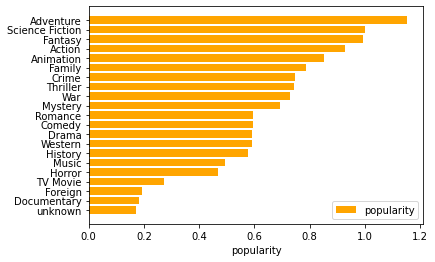

In [27]:
plt.barh(x1,y1,color="orange",label='popularity')
plt.legend()
plt.xlabel('popularity')

It seems the most popular genre is adventure, followed by science fiction....
What about profit? lets do the same

In [28]:
df_geners_profit=df1.groupby(['genres'],as_index=False)['profit'].sum().sort_values(by=['profit'])
df_geners_profit

,genres,profit
9,Foreign,-1.118346e+08
20,unknown,-2.808184e+04
16,TV Movie,8.953509e+06
5,Documentary,8.501937e+08
19,Western,3.564631e+09
10,History,7.144447e+09
18,War,1.108513e+10
12,Music,1.373616e+10
13,Mystery,2.544265e+10
11,Horror,2.671535e+10


Elaborating with bar chart as above

In [29]:
x2=df_geners_profit['genres']
y2=df_geners_profit['profit']

Text(0.5, 0, 'profit')

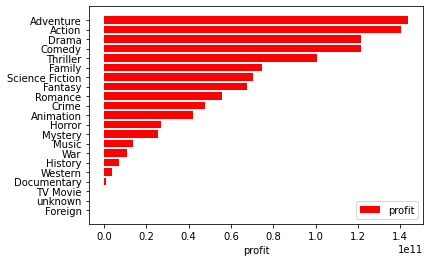

In [30]:
plt.barh(x2,y2,color="red",label='profit')
plt.legend()
plt.xlabel('profit')

so the adventure genre is the most popular and most profitable to produce !!

### Research Question 2  (what are the properties that is associated with higher rating movies ?)

In [31]:
df2=df_m

Now for the second question, lets check how many rating unique values are 

In [32]:
df2.vote_average.nunique()

72

In [33]:
df2.vote_average.describe()

count    10834.000000
mean         5.976343
std          0.935047
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

So there is 72 unique voting rating, i think filtering them to ( low, medium, and high ) would make group by much easier, where low is from minimum to first quartile, and medium is from first quartile to third quartile and high rating is from third quartile to maximum, using same methedology as from CASE 1 study

In [34]:
bin_edges=[df2.vote_average.min(),df2.vote_average.quantile(0.25),df2.vote_average.quantile(0.75),df2.vote_average.max()]
bin_names = ['high', 'medium', 'low']
df2['rating']=pd.cut(df2['vote_average'], bin_edges, labels=bin_names)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    10834 non-null  int64   
 1   popularity            10834 non-null  float64 
 2   original_title        10834 non-null  object  
 3   cast                  10834 non-null  object  
 4   director              10834 non-null  object  
 5   runtime               10834 non-null  int64   
 6   genres                10834 non-null  object  
 7   production_companies  10834 non-null  object  
 8   release_date          10834 non-null  object  
 9   vote_count            10834 non-null  int64   
 10  vote_average          10834 non-null  float64 
 11  release_year          10834 non-null  int64   
 12  budget                10834 non-null  float64 
 13  revenue               10834 non-null  float64 
 14  profit                10834 non-null  float64 
 15  ra

Grouping by rating

In [36]:
df2.groupby(['rating']).mean()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue,profit
rating,,,,,,,,,
high,79326.389972,0.421432,95.878830,67.937674,4.793872,2003.952646,1.236791e+07,1.575997e+07,3.392063e+06
medium,57086.804085,0.632934,103.355803,191.667781,6.058217,2000.555989,1.973117e+07,5.317241e+07,3.344124e+07
low,68757.947961,0.931648,107.539806,440.438058,7.127456,1999.888932,1.898795e+07,8.797209e+07,6.898414e+07


It seems the lower the runtime of a movie the higher it is rated generally speaking

Also it seems lower rated movies has higher voters than higher rated movies

I will try to elaporate using the same bar plot for two y axis with the help of stackoverflow

https://stackoverflow.com/questions/24183101/pandas-bar-plot-with-two-bars-and-two-y-axis

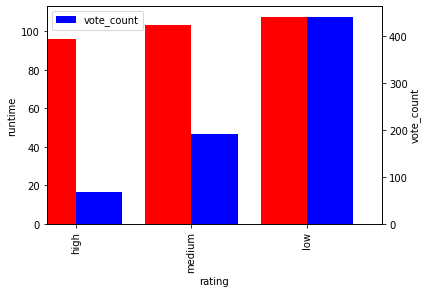

In [37]:
df_plot=df2.groupby(['rating']).mean()
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df_plot.runtime.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df_plot.vote_count.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('runtime')
ax2.set_ylabel('vote_count')
plt.legend()

plt.show()

### Research Question 3  (Who is the actor that made the largest numbers of movies and who made the least and their ranking)

gonna split and explode cast column like we did with genre

In [38]:
df3=df_m

In [39]:
df3=df3.assign(cast=df3.cast.str.split('|')).explode('cast')
df3.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,profit,rating
0,135397,32.985763,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,medium
0,135397,32.985763,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,medium
0,135397,32.985763,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,medium
0,135397,32.985763,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,medium
0,135397,32.985763,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,medium


In [40]:
df3.cast.value_counts()

unknown              76
Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
                     ..
Bronagh Gallagher     1
David Pearse          1
Adrian Hough          1
Pauley Perrette       1
Stephanie Nielson     1
Name: cast, Length: 18965, dtype: int64

the unknown values are the 76 values of column cast that were replaced during data wrangling.

so the top actors that acted the most in this set are respectively `(Robert De Niro, Samuel L. Jackson,Bruce Willis ,Nicolas Cage )` while the least are not famous actors.

### Funny_question_1  (is their a relation between the length of the movie title and its popularity ?)

In [41]:
df_f1=df_m

lets get sure that the title doesn't have space at the beginning or at the end and then get the length of each movie title in a new column

In [42]:
df_f1['original_title']=df_f1['original_title'].str.strip()
df_f1.loc[:,'Length'] = df_f1['original_title'].apply(len)

In [43]:
df_f1.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget,revenue,profit,rating,Length
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,medium,14
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08,low,18
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08,medium,9
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09,low,28
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,1.210949e+09,low,9


lets do a scatter plot and then make a conclusion

Text(0, 0.5, 'popularity')

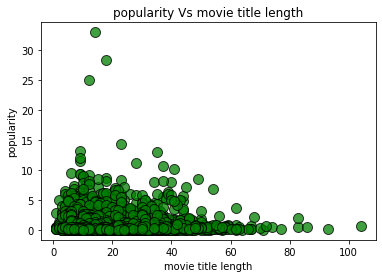

In [44]:
x_f1=df_f1['Length']
y_f1=df_f1['popularity']
plt.scatter(x_f1,y_f1,s=100,c='Green', edgecolor='black',linewidth=1, alpha=0.75)
plt.title('popularity Vs movie title length')
plt.xlabel('movie title length')
plt.ylabel('popularity')

It seems if the movie length is above 60 character, the popularity is very low

It seems the popularity increases with title length until movie title lenghth is  10  characters

From 10 to 60 characters in movie length, the popularity seems to decrease with length

If i would suggest a movie name, i will target a title from 8 to 20 character long !!

### Funny_question_2  (what is the starting character of movie title that is associated with highest popularity? :)

In order to do that i will make a new column that contains the first letter only of the movie title then do a groupby

In [45]:
df_f2=df_f1
# because df_f1 has the title already stripped

In [46]:
df_f2['starting_letter']=df_f2['original_title'].apply(lambda x:x[0])
df_f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    10834 non-null  int64   
 1   popularity            10834 non-null  float64 
 2   original_title        10834 non-null  object  
 3   cast                  10834 non-null  object  
 4   director              10834 non-null  object  
 5   runtime               10834 non-null  int64   
 6   genres                10834 non-null  object  
 7   production_companies  10834 non-null  object  
 8   release_date          10834 non-null  object  
 9   vote_count            10834 non-null  int64   
 10  vote_average          10834 non-null  float64 
 11  release_year          10834 non-null  int64   
 12  budget                10834 non-null  float64 
 13  revenue               10834 non-null  float64 
 14  profit                10834 non-null  float64 
 15  ra

In [47]:
df_f2.starting_letter.value_counts().head(60)

T    2377
S     885
B     735
A     685
M     584
C     560
D     512
H     463
L     440
P     409
F     401
R     356
W     317
I     290
G     289
E     249
J     225
N     207
K     163
O     162
V      99
U      98
1      46
Y      45
Z      41
2      37
3      22
Q      21
X      15
4      12
9      10
5      10
8       7
ì       7
7       5
6       5
Ã       3
í       3
Ð       3
æ       3
é       3
è       3
à       2
(       2
ç       2
$       2
i       2
x       2
ã       2
å       2
Î       1
×       1
.       1
*       1
'       1
u       1
ë       1
ä       1
e       1
ê       1
Name: starting_letter, dtype: int64

so, most movies begin with letter T, now lets groupby

In [48]:
df_f2.groupby(['starting_letter'],as_index=False)['popularity'].mean().sort_values(by=['popularity'],ascending=False).head(60)

,starting_letter,popularity
2,(,1.978513
43,x,1.671158
1,',1.220073
6,2,0.903278
45,Ã,0.880166
34,U,0.863626
22,I,0.843327
8,4,0.763425
23,J,0.747826
44,Â,0.731945


The results above shows that `(` initial of a movie has the most popularity.
But these results are not fair enough, because the initial of `(` seems to be appeared two times only, so i will set a minimum appearance of the initial character equal to at leat the second quartile of view count of the initials, i will try to do this by merging two dataframes,`letter_value_count` and `letter_popularity` after defining them

In [49]:
letter_value_count=df_f2.starting_letter.value_counts()
letter_popularity=df_f2.groupby(['starting_letter'])['popularity'].mean()
combined_df=pd.merge(letter_value_count,letter_popularity,left_index=True,right_index=True)
combined_df.head()

,starting_letter,popularity
T,2377,0.701609
S,885,0.674198
B,735,0.601409
A,685,0.613160
M,584,0.666716


Now after forming combined dataframe, i will drop all rows that is  less than mean starting_letter_count and sort via popularity

In [50]:
combined_df.drop(combined_df[combined_df.starting_letter<letter_value_count.quantile(0.5)].index, inplace=True)

In [51]:
combined_df.sort_values('popularity', ascending=False)

,starting_letter,popularity
2,37,0.903278
U,98,0.863626
I,290,0.843327
4,12,0.763425
J,225,0.747826
3,22,0.707029
T,2377,0.701609
5,10,0.700084
P,409,0.686674
S,885,0.674198


So i can say that movies that has initil character `2`has the most popularity

<a id='conclusions'></a>
## Conclusions

so, after processing this data set we can conclude the following :

### 1- the most popular genre throught the time provided in this dataset is advanture, it is also the most associated with higher profit

### 2- it seems longer movies in general does have lower rating, also shorter movies does have higher rating. also it seems that lower rating movies have very high voters count comparing to higher rating movies ( people always love to critisize, i guess). of course these findings are general because only the mathematical mean was compared

### 3- Actors that acted the most in the movies here are `( Robert De Niro, Samuel L. Jackson,Bruce Willis ,Nicolas Cage)`...Kindly note that 'UNKNOWN' was the first in the list, mathematically speaking. If the data regarding cast were complete may be we had different results.

I added some funny questions and answered them, the conclusion of funny question is : popularity is the highest if the letters of the titles is between 8 and 20 letters, also the letter `(T)` is the letter that most movies title start with. Lastly it seems movies title with initial character of `2` has the highest popularity

Finally, i would like to point out that this set of data has much information, other statistics can be applied to elaborate other relationships that i didn't study here, like for example, who is the most director that produced movies that has the most popularities with what genres ?


### Limitations

There is a big limitation here, as can be seen from data processed above, around 52 % of budget data is zero !! which affects profit calculation greatly. Combined with zero revenue, around 65 % of profit is zero or wrongly calculated !!

I could have worked on 35 % of the data to get more accurate results regarding first question, but it doesn't make sense to delete 2/3 of the data!!!, the data then would not be representative



In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


255